# Giải thuật K – nearest neighbor: 

K-Nearest Neighbors (KNN) là một trong những thuật toán đơn giản nhất trong học máy, 
nhưng dù đơn giản, nó lại rất hiệu quả trong nhiều bài toán phân loại và hồi quy, chẳng hạn 
như nhận dạng ký tự hay phân tích hình ảnh. KNN là một thuật toán không tham số, có 
nghĩa là nó không giả định bất kỳ mô hình phân phối dữ liệu nào, giúp thuật toán hoạt động 
hiệu quả với các tập dữ liệu phức tạp. 


KNN là một phương pháp học máy dựa trên nguyên lý tìm kiếm k điểm dữ liệu gần nhất 
với dữ liệu di và đưa ra quyết định phân loại / phân cụm dựa trên k điểm gần nhất này. 
Thông thường, điểm sẽ được phân loại theo loại dữ liệu có số lượng điểm trong k điểm là 
lớn nhất.

# Câu 1: Lập trình Class PointCloud cho phép tạo dữ liệu đám mây điểm 2D như hình. 

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
np.random.seed(42)

In [102]:
class PointCloud:
    def __init__(self, num_classes, num_points, radius):
        self.num_classes = num_classes # số class cần tạo
        self.num_points = num_points # số điểm mỗi class
        self.radius = radius # phạm vi bán kính 
        self.X, self.labels = [], []

    def draw(self, label= True, draw= True):
        for k in range(self.num_classes):
            center = np.random.randint(0, 5, 2)  # Tâm hình tròn
            radius = np.random.randint(1, self.radius)    # Bán kính 
            angles = np.random.uniform(0, 2 * np.pi, self.num_points) # random điểm theo phân phối đều 
            radii = np.random.uniform(0, radius, self.num_points) # khởi tạo bán kính ngẫu nhiên cho từng class 

            data_point = np.column_stack((
                center[0] + radii * np.cos(angles),
                center[1] + radii * np.sin(angles)
            ))
            self.X.append(data_point)
            self.labels.append(np.full((self.num_points, 1), k))

        # Vẽ các điểm dữ liệu
        if draw:
            if label:
                for i, k in enumerate(self.X):
                    plt.scatter(k[:, 0], k[:, 1], label= f'Class {i}')
            else:
                for i, k in enumerate(self.X):
                    plt.scatter(k[:, 0], k[:, 1], c= 'b')
            
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.title("Circular Distribution")
            plt.legend() if label else None
            plt.show()

    def create_dataset(self):
        # Tạo dataset cuối cùng
        self.X = np.vstack(self.X)
        self.labels = np.vstack(self.labels)
        dataset = np.hstack((self.X, self.labels))
        return dataset, self.X, self.labels

    def draw_newpoint(self, new_point):
        for i in range(self.num_classes):
            data = self.X[np.where(self.labels == i), :].reshape(-1, 2)
            plt.scatter(data[:, 0], data[:, 1], label= f'Class {i}')
        plt.scatter(new_point[0], new_point[1], label= f'New point')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Circular Distribution")
        plt.legend()
        plt.show()

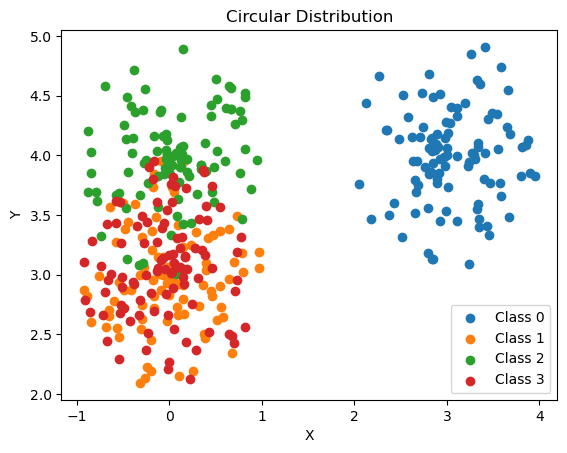

In [103]:
num_classes = 4
num_points = 100
radius = 2

point_cloud = PointCloud(num_classes, num_points, radius)
point_cloud.draw() 
dataset, _ , _ = point_cloud.create_dataset()

# Câu 2: Lập trình chương trình classifier sử dụng thuật toán KNN cho phép nhận biết và phân loại các điểm ngẫu nhiên theo dữ liệu mẫu đám mây điểm 2D đả được tạo ở câu 1.  

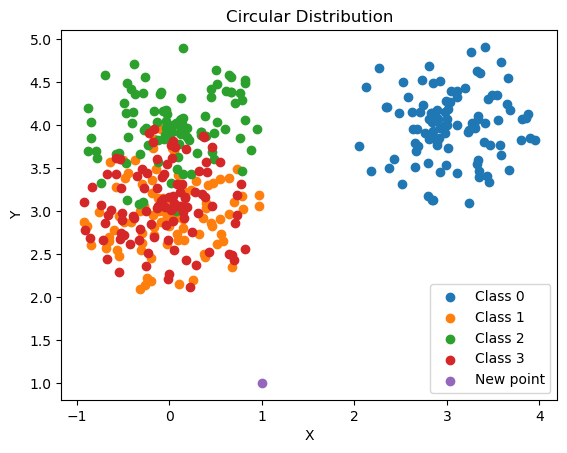

'Predict class is: 3'

In [104]:
class Classifier(PointCloud):
    def __init__(self, dataset, new_point, num_classes, num_points, radius, k_neighbor):
        super().__init__(num_classes, num_points, radius)
        self.dataset = dataset
        self.new_point = new_point
        self.X = self.dataset[:, :-1]
        self.labels = self.dataset[:, -1]
        self.k_neighbor = k_neighbor

    def classifier(self):
        euclidian_distance = np.sqrt(np.sum((self.new_point - self.X)**2,  
                                             axis= 1, keepdims= True)) # Tính khoảng cách từ điểm mới
                                                                        # tới tất cả các điểm khác trong datadata
                                                                                    
        argsort = np.argsort(euclidian_distance, axis= 0) # xắp xếp theo thứ tự gần nhất rồi lấy index
        list_arg = self.labels[argsort[:self.k_neighbor]].reshape(-1,) # lấy k chữ số đầu 
        # print(list_arg)
        max = 0
        predict = None

        for i in range(self.num_classes):
            num_component = (np.where(list_arg == i))[0].shape[0]
            # print(num_component)
            if max < num_component:
                max = num_component
                predict = i
        return f'Predict class is: {predict}'

k_neighbor = 9
new_point = np.array([1, 1])
classify = Classifier(dataset, new_point, num_classes, num_points, radius, k_neighbor)
classify.draw_newpoint(new_point)
classify.classifier()


# Câu 3: Lập trình chương trình regressor sử dụng thuật toán KNN để dự đoán sự biến thiên theo thời gian của 1 đồ thị cho trước. Sử dụng Class Point để tạo đồ thị với nhiễu trắng. 

In [105]:
class Point:
    def __init__(self, coeff_, start, end, step, noise_coeff):
        self.coeff_ = coeff_ # hệ số dưới dang list [^0 ^1 ^2 ^3]
        self.predict_point = None
        self.linespace = np.linspace(start, end, int(end / step)) # tạo giá trị trên trục xx
        self.noise_coeff = noise_coeff

    def calculate(self):
        self.sum = 0
        # tính giá trị trên trục y 
        for i, value in enumerate(self.coeff_):
            temp = value * (self.linespace)**i 
            self.sum += temp
        self.noise = np.random.rand(*self.sum.shape)
        self.sum += self.noise_coeff * self.noise
    
    def regression(self, input_, k_order):
        # tính khoảng cách từ input tới các điểm trong biểu đồ
        distance = np.abs(input_ - self.linespace)
        # lấy k giá trị gần nhất 
        argsort_k = np.argsort(distance)[:k_order]
        mean = self.sum[argsort_k].mean()
        self.predict_point = (input_, mean)
    
    def draw(self):
        plt.scatter(self.linespace, self.sum, 20, label = 'Value')
        if self.predict_point:
            plt.scatter(self.predict_point[0], self.predict_point[1], 20, label = "Point")
        plt.grid()
        plt.xlabel('X')
        plt.ylabel('Cost')
        plt.title('Regression')
        plt.legend()
        plt.show()

            

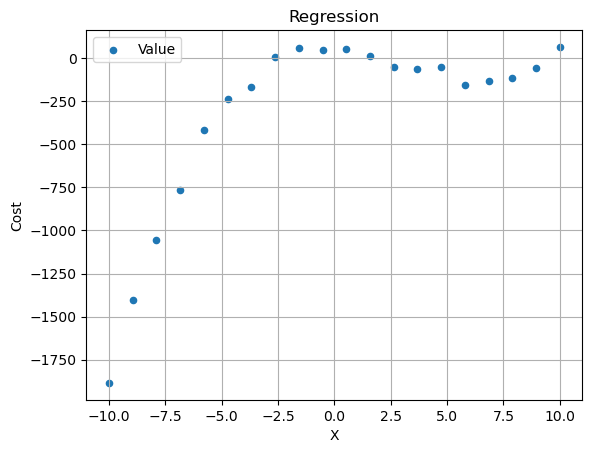

In [106]:
noise_coeff = 100
list_coeff = [-3, -2.5, -10, 1] 
start = -10
end = 10
step = 0.5

point = Point(list_coeff, start, end, step, noise_coeff)
point.calculate()
point.draw()

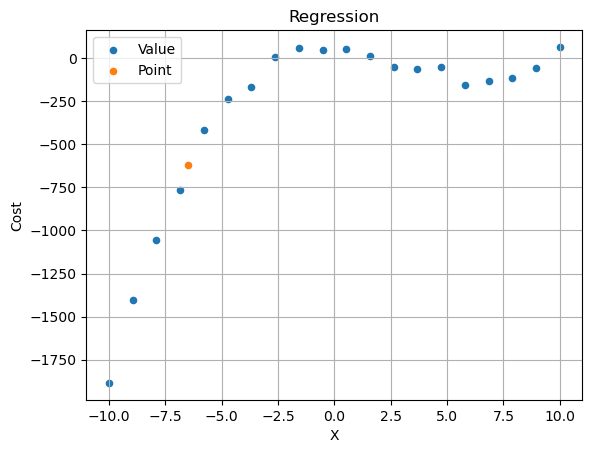

(-6.5, -618.4321520502334)

In [107]:
input_value = -6.5
k_order = 4

point.regression(input_value, k_order)
point.draw()
point.predict_point

Giải thuật phân cụm K – mean: 

Học máy không giám sát là quá trình dạy máy tính làm việc với dữ liệu không được gán 
nhãn hoặc phân loại trước, cho phép thuật toán xử lý dữ liệu mà không cần sự giám sát. 
Không có dữ liệu huấn luyện trước đó, nhiệm vụ của máy là tổ chức dữ liệu chưa được sắp 
xếp dựa trên sự tương đồng, mẫu hình và biến thể. 

K-means clustering (phân cụm K-means) là một thuật toán học máy không giám sát cho 
phép chương trình máy tính tự động gán các điểm dữ liệu vào một trong K loại dữ liệu 
bằng cách tính toán khoảng cách của các điểm này tới K - tâm cụm.  - - - 

Quá trình bắt đầu bằng cách gán ngẫu nhiên các tâm cụm cho các điểm ban đầu 
trong không gian của dữ liệu. Sau đó, mỗi điểm dữ liệu được gán vào một cụm dựa 
trên khoảng cách của nó tới tâm cụm tương ứng.  

Sau khi gán mỗi điểm dữ liệu vào một cụm, các tâm cụm mới sẽ được tính lại.  
Quá trình sẽ được lặp lại nhiều lần cho đến khi các tâm cụm không còn thay đổi 
đáng kể. 

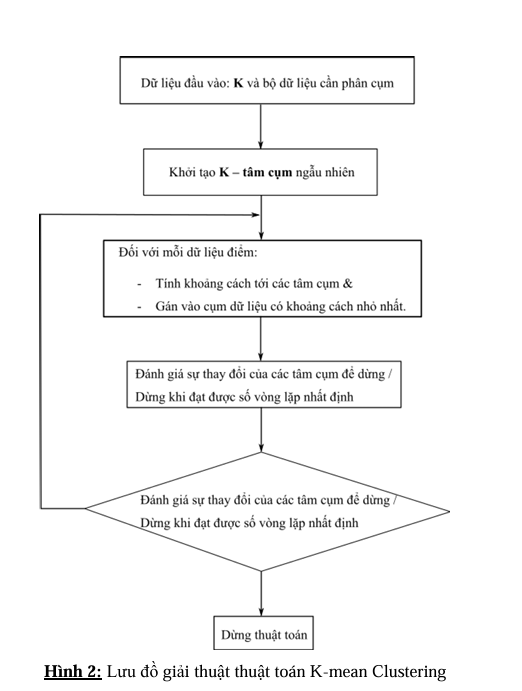

# Câu 4: Lập trình chương trình K-mean clustering cho phép phân cụm 1 bộ dữ liệu điểm cho trước. K được định nghĩa trước bởi người dùng.

In [108]:
class K_mean:
    def __init__(self, dataset):
        self.dataset = dataset # dataset phải là 2D array, số cột là feature, số hàng là samplesample
        self.dimension = dataset.shape[1]
        

    def fit(self, k_cluster, epoch= 1000):
        self.epoch = epoch 
        self.k_cluster = k_cluster
        # khởi tạo ngẫu nhiên tâm cụm, stack theo chiều thứ 3
        self.center_matrix = np.zeros((1, self.dimension, self.k_cluster))
        for i in range(self.k_cluster):
            self.center_matrix[..., i] = self.dataset[np.random.randint(len(dataset))]

        # print(self.center_matrix.shape)
        # print(f'Before: {self.center_matrix}')

        # thêm 1 trục cho dataset để broadcasting 
        # (1, dim, k_cluster) compatible with (n_sample, dim, 1)
        self.dataset_newaxis = self.dataset[..., np.newaxis] 

        for _ in range(self.epoch):
            # tính khoarng cách theo ecludian 
            # minus.shape = (n_sample, dim, k_cluster)
            self.minus = self.center_matrix - self.dataset_newaxis
            self.distance = np.sqrt( (self.minus ** 2).sum(axis= 1, keepdims= True) )

            # lấy index của gía trị nhỏ nhất 
            self.list_min_index = np.argmin(self.distance, axis= 2).squeeze()

            # tìm center mới 
            for i in range(self.k_cluster):
                if np.where(self.list_min_index == i)[0].__len__() == 0:
                    pass
                else: 
                    index = np.where(self.list_min_index == i)
                    table_i = self.dataset[index]
                    self.center_matrix[..., i] = table_i.mean(axis= 0,  keepdims= True)
        
        # print(f'After: {self.center_matrix}')

    def draw(self):
        for i in range(self.k_cluster):
            plt.scatter(*self.dataset.T, 10, label = f'Value {i}')
        for i in range(self.k_cluster):
            plt.scatter(self.center_matrix[..., i].squeeze()[0], self.center_matrix[..., i].squeeze()[1], 20, label= f'Center {i}')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Circular Distribution")
        plt.legend()
        plt.show()

    

In [109]:
k_cluster = 6
epoch = 10000
num_classes = 6
num_points = 100
radius = 2

point_cloud = PointCloud(num_classes, num_points, radius)
point_cloud.draw(label= False, draw= False)
_ , dataset, _ = point_cloud.create_dataset()

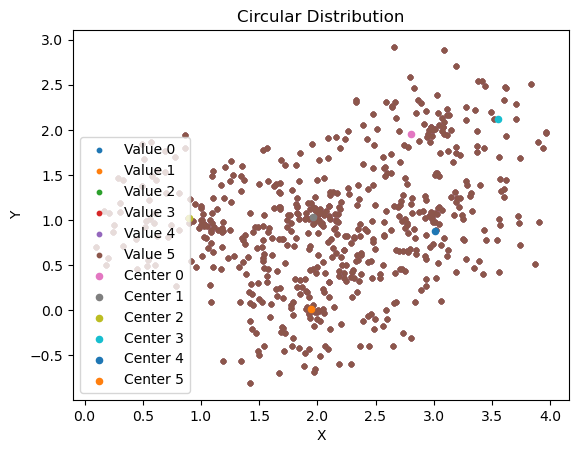

In [110]:
k_mean = K_mean(dataset)
k_mean.fit(k_cluster, epoch)
k_mean.draw()

# Câu 5: Lập trình chương trình K-mean clustering cho phép tự động tìm giá trị K tối ưu. 

In [111]:
k_cluster = 6
epoch = 10000
num_classes = 6
num_points = 100
radius = 2

point_cloud = PointCloud(num_classes, num_points, radius)
point_cloud.draw(label= False, draw= False)
dataset , X, labels = point_cloud.create_dataset()

In [112]:
# class K_mean_optimal(K_mean):
#     def __init__(self, dataset):
#         super().__init__(dataset)
    
#     def calculate_sc_cluster(self, input_array):
#         # thêm trục vào cum -> cluster_i_newaxis.shape = (n_sample, n_dim, 1)
#         cluster_i_newaxis = input_array[..., np.newaxis]

#         # hoán đổi vị trí các cột -> cluster_i_transpose.shape = (1, n_dim, n_sample)
#         cluster_i_transpose = cluster_i_newaxis.transpose(2, 1, 0)

#         # cluster_.shape = (n_sample, n_dim, n_sample)
#         #                   lặp điểm         lặp mảng 
#         cluster_ = cluster_i_newaxis - cluster_i_transpose

#         # ecludian distance
#         cluster_ = np.sqrt((cluster_**2).sum(axis= 1, keepdims= True))
        
#         # silhouette coefficient cho điểm 
#         sc_point = cluster_.mean(axis= 0, keepdims= True)

#         # silhouette coefficient cho cụm 
#         sc_cluster = sc_point.mean()

#         # print(f'sc_cluster : {sc_cluster}')
#         return sc_cluster

#     def find_optimal(self, draw= True, num_k= 20, epoch= 10000):
#         self.sc_list = []
#         for k in range(2, num_k):
#             self.fit(k, epoch)
#             cluster_array = []
#             # chia dataset thành các cụm rồi đưa vào list 
#             for i in range(k):
#                 table_i = self.dataset[self.list_min_index == i]
#                 cluster_array.append(table_i)

#             sc = 0
#             # tạo vòng lặp trong list 
#             for j in range(len(cluster_array)):

#                 sc_cluster_a = self.calculate_sc_cluster(cluster_array[j])  # Chỉ tính một lần
#                 min_sc_cluster_b = np.inf

#                 for i in range(len(cluster_array)):
#                     if i != j:  # Chỉ tính SC của các cụm khác
#                         sc_cluster_b = self.calculate_sc_cluster(cluster_array[i])
#                         min_sc_cluster_b = min(min_sc_cluster_b, sc_cluster_b)  # Lấy giá trị nhỏ nhất đúng cách

#                 sc_i = sc_i = (min_sc_cluster_b - sc_cluster_a) / max(sc_cluster_a, min_sc_cluster_b)
#                 sc += sc_i
#                 # print(f'min_sc_cluster_b : {min_sc_cluster_b}')
#                 # print(f'sc_cluster : {sc_i}')
#             sc/= len(cluster_array)
#             self.sc_list.append(sc)
        
#         if draw:
#             self.sc_list = np.array(self.sc_list)
#             plt.plot(self.sc_list)
#             plt.show()

    

In [113]:
class K_mean_optimal(K_mean):
    def __init__(self, dataset):
        super().__init__(dataset)
        self.dataset = dataset
        self.dimension = dataset.shape[1]
        self.list_min_index = None  # Sẽ được cập nhật khi gọi self.fit()

    def calculate_silhouette_score(self, X, labels):
        """
        Silhouette Score cho mỗi điểm i được tính như sau:
            - a(i) = khoảng cách trung bình giữa điểm i và các điểm trong cùng cụm
            - b(i) = khoảng cách trung bình từ điểm i đến cụm gần nhất KHÁC (khoảng cách trung bình nhỏ nhất)
            - s(i) = (b(i) - a(i)) / max(a(i), b(i))
        Silhouette Score toàn tập = trung bình tất cả s(i).
        """
        N = X.shape[0]
        labels = labels.flatten()
        silhouette_vals = np.zeros(N)

        for i in range(N):
            # Các điểm cùng cụm với i
            same_cluster_idx = (labels == labels[i])
            same_cluster_points = X[same_cluster_idx]

            # a(i): khoảng cách trung bình giữa X[i] và các điểm trong cùng cụm
            # nếu cụm chỉ có 1 điểm, a(i) = 0
            if len(same_cluster_points) <= 1:
                a_i = 0
            else:
                a_i = np.mean(
                    np.sqrt(np.sum((X[i] - same_cluster_points)**2, axis=1))
                )

            # b(i): khoảng cách trung bình nhỏ nhất tới cụm khác
            b_i = float('inf')
            unique_labels = np.unique(labels)
            for cluster_id in unique_labels:
                if cluster_id == labels[i]:
                    continue  # bỏ qua cụm hiện tại
                other_cluster_points = X[labels == cluster_id]
                if len(other_cluster_points) > 0:
                    dist_avg = np.mean(
                        np.sqrt(np.sum((X[i] - other_cluster_points)**2, axis=1))
                    )
                    if dist_avg < b_i:
                        b_i = dist_avg

            # Tính s(i): (b(i) - a(i)) / max(a(i), b(i))
            # Tránh chia 0 khi cả a_i và b_i = 0
            if max(a_i, b_i) == 0:
                silhouette_vals[i] = 0
            else:
                silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i)

        # Trả về trung bình s(i) trên tất cả điểm
        return np.mean(silhouette_vals)

    def find_optimal(self, draw=True, num_k=10, epoch=100):
        """
        Tìm k tối ưu bằng cách:
        1) Duyệt qua k từ 2 -> num_k.
        2) Mỗi k sẽ gọi self.fit(k, epoch) để phân cụm.
        3) Tính Silhouette Score của kết quả phân cụm.
        4) Lưu kết quả Silhouette Score vào self.sc_list.
        5) Cuối cùng, nếu draw=True, sẽ vẽ biểu đồ Silhouette Score theo k.
        """
        self.sc_list = []

        # Duyệt k từ 2 -> num_k
        for k in range(2, num_k + 1):
            # Gọi fit() để chạy K-means (cần code K-means thật thay thế ở trên)
            self.fit(k, epoch)
            # Tính Silhouette Score với nhãn cụm self.list_min_index
            silhouette_avg = self.calculate_silhouette_score(self.dataset, self.list_min_index)
            self.sc_list.append(silhouette_avg)

        # Nếu muốn vẽ đồ thị Silhouette Score
        if draw:
            k_range = list(range(2, num_k + 1))
            plt.plot(k_range, self.sc_list, marker='o')
            plt.title("Silhouette Score theo k")
            plt.xlabel("k")
            plt.ylabel("Silhouette Score")
            plt.grid(True)
            plt.show()



In [114]:
labels.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

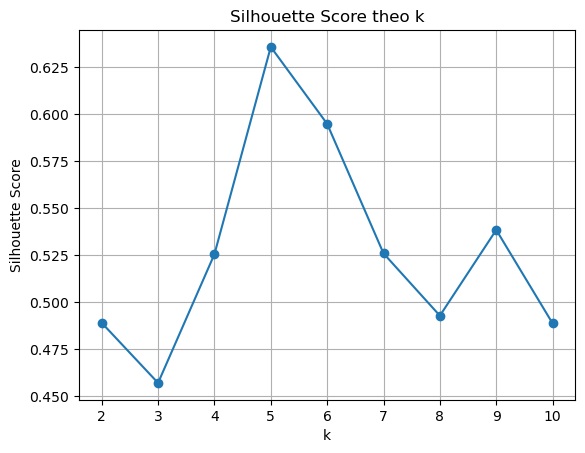

In [115]:
k_mean_optimal = K_mean_optimal(dataset)
k_mean_optimal.calculate_silhouette_score(X, labels)
k_mean_optimal.find_optimal()

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 600.

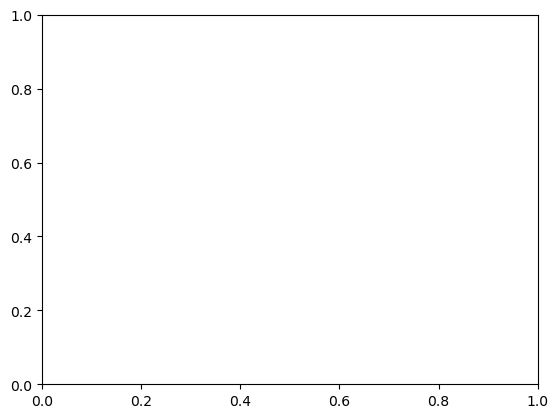

In [116]:
k_mean_optimal.fit(5)
k_mean_optimal.draw()